# Exploratory Data Analysis of OSIC IPF Data
***

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import pydicom as dicom

### 2. Load Train/Test data

In [7]:
patient_data = pd.read_csv('../data/osic-pulmonary-fibrosis-progression/train.csv')

In [8]:
patient_data.shape

(1549, 7)

In [9]:
patient_data.head() 

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [10]:
# Dropping duplicate records in th train data
patient_data.drop_duplicates(subset=['Patient', 'Weeks'], keep=False, inplace=True)
patient_data.shape

(1535, 7)

### 3. EDA

In [11]:
patient_data.columns

Index(['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus'], dtype='object')

In [12]:
# Looking at the null values
patient_data.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [13]:
patient_data.dtypes

Patient           object
Weeks              int64
FVC                int64
Percent          float64
Age                int64
Sex               object
SmokingStatus     object
dtype: object

#### Insight
- No Null values in the dataset.

#### 3.1 Exploring the categorical variables

In [18]:
len(patient_data['Patient'].unique())

176

- Total 176 unique Ptients present in the data set.

In [20]:
# Filtering dataframe with unique patient informationunique_patient_data
uniquePatient=[]
for p in patient_data['Patient'].unique():
    patientData = patient_data[patient_data['Patient'] == p]
    firstMeasure = list(patientData.iloc[0, :].values)
    uniquePatient.append(firstMeasure)

unique_patient_data = pd.DataFrame(uniquePatient)
unique_patient_data.columns = ['PatientID', 'first_week', 'first_FVC', 'first_Percent', 'Age', 'Sex', 'SmokingStatus']

unique_patient_data.head()

,PatientID,first_week,first_FVC,first_Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00009637202177434476278,8,3660,85.282878,69,Male,Ex-smoker
2,ID00010637202177584971671,0,3523,94.724672,60,Male,Ex-smoker
3,ID00011637202177653955184,6,3326,85.987590,72,Male,Ex-smoker
4,ID00012637202177665765362,33,3418,93.726006,65,Male,Never smoked


In [21]:
unique_patient_data.shape

(176, 7)

In [22]:
unique_patient_data.Sex.value_counts()

Male      139
Female     37
Name: Sex, dtype: int64

In [23]:
unique_patient_data.SmokingStatus.value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

In [29]:
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color= 'white')

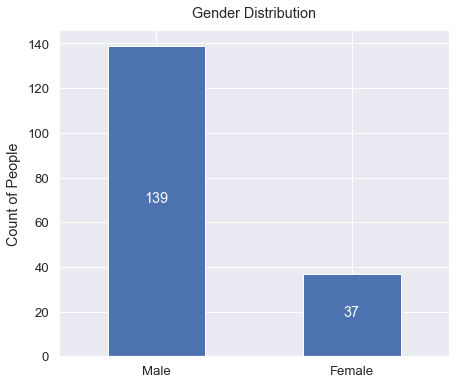

In [30]:
sns.set(font_scale=1.2)
unique_patient_data.Sex.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.ylabel("Count of People", labelpad=6)
plt.title("Gender Distribution", y=1.02);
addlabels(unique_patient_data.Sex.value_counts())
plt.savefig('../plots/gender.png' ,bbox_inches="tight")

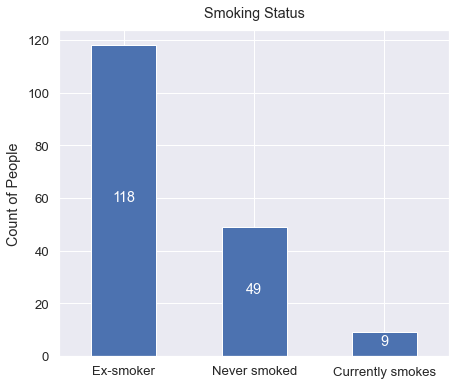

In [31]:
sns.set(font_scale=1.2)
unique_patient_data.SmokingStatus.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.ylabel("Count of People", labelpad=6)
plt.title("Smoking Status", y=1.02);
addlabels(unique_patient_data.SmokingStatus.value_counts())
plt.savefig('../plots/smokingstatus.png',bbox_inches="tight")

#### 3.2 Exploring the numerical variables

In [32]:
patient_data.describe()

,Weeks,FVC,Percent,Age
count,1535.000000,1535.000000,1535.000000,1535.000000
mean,32.002606,2692.054723,77.748167,67.196743
std,23.211768,835.110785,19.871669,7.079479
min,-5.000000,827.000000,28.877577,49.000000
25%,12.500000,2106.500000,62.869946,63.000000
50%,28.000000,2641.000000,75.678610,68.000000
75%,47.000000,3178.000000,88.684532,72.000000
max,133.000000,6399.000000,153.145378,88.000000


#### 3.3 Exploring CT scans

In [39]:
# specify your image path
image_path = '../data/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/8.dcm'
ds_1 = dicom.dcmread(image_path)

In [40]:
# specify your image path
image_path = '../data/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/10.dcm'
ds_2 = dicom.dcmread(image_path)

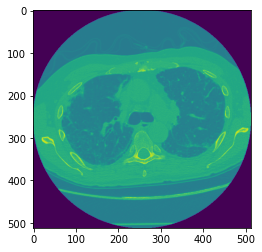

In [26]:
# specify your image path
image_path = '../data/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/12.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

In [27]:
# specify your image path
image_path = '../data/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/15.dcm'
ds2 = dicom.dcmread(image_path)

In [28]:
# specify your image path
image_path = '../data/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/17.dcm'
ds3 = dicom.dcmread(image_path)

In [29]:
# specify your image path
image_path = '../data/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/19.dcm'
ds4 = dicom.dcmread(image_path)

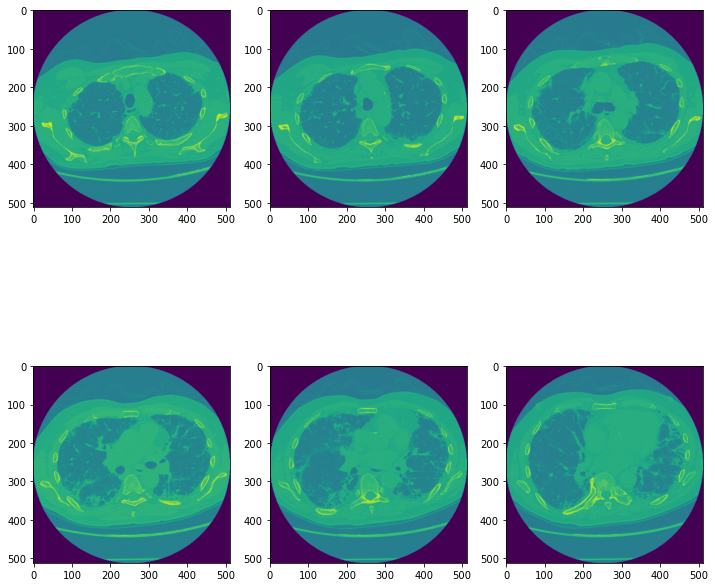

In [45]:
fig = plt.figure(figsize = (12,12))

fig.add_subplot(2, 3, 1)
plt.imshow(ds_1.pixel_array)

fig.add_subplot(2,3, 2)
plt.imshow(ds_2.pixel_array)

fig.add_subplot(2, 3, 3)
plt.imshow(ds.pixel_array)

fig.add_subplot(2, 3, 4)
plt.imshow(ds2.pixel_array)

fig.add_subplot(2, 3, 5)
plt.imshow(ds3.pixel_array)

fig.add_subplot(2, 3, 6)
plt.imshow(ds4.pixel_array)

In [47]:
ds.PixelSpacing

[0.652344, 0.652344]

In [20]:
print (str(ds.Rows) + ' x ' + str(ds.Columns))

512 x 512


In [ ]:
ds.saveimage('../med_image/smokingstatus.png',bbox_inches="tight")

In [21]:
ds.Modality

'CT'

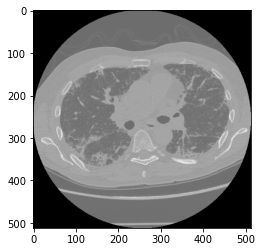

In [25]:
pix= ds.pixel_array
plt.imshow(pix, cmap= 'gray')